In [78]:
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt

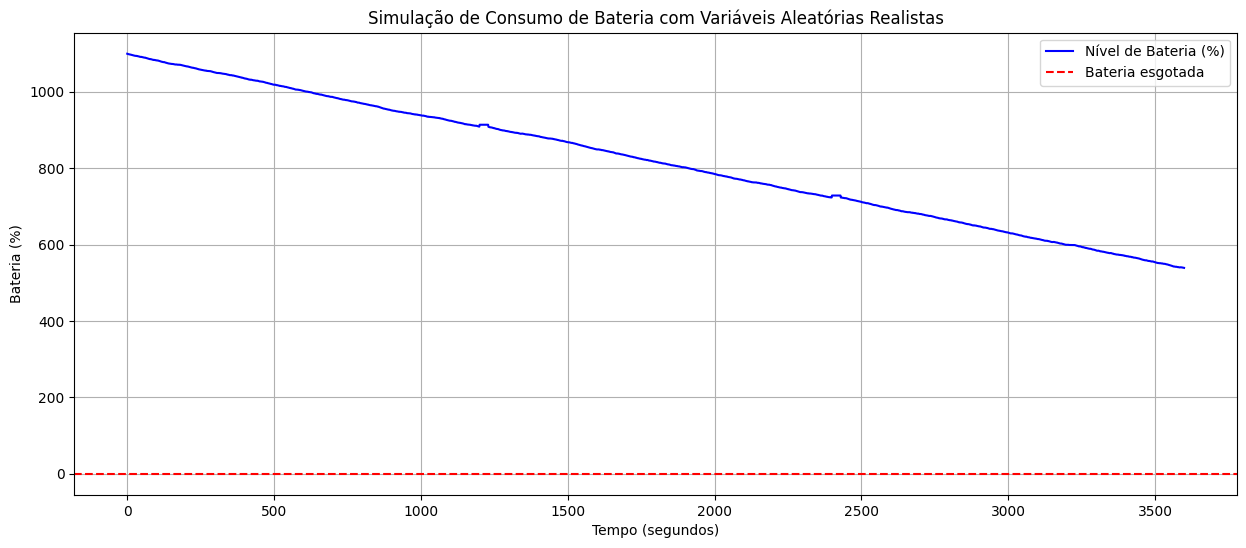

In [340]:
# SIMULACAO DE BATERIA DE UM CARRO FOMRMULA-E DURANTE A CORRIDA

tempo_total = 3600 
bateria_inicial = 1100

pit_stop_tempo = np.zeros(tempo_total)
pit_stop_tempo[1200:1230] = 1  
pit_stop_tempo[2400:2430] = 1 

def simular_consumo(tempo_total, bateria_inicial):
    consumo_base = random.uniform(0.01, 0.5) 
    regeneracao_frenagem = random.uniform(0.01, 0.3) 
    consumo_aceleracao = random.uniform(0.01, 0.2) 

  
    condicoes_pista = np.random.uniform(-1, 1, tempo_total) 
    
    aceleracao_frenagem = np.random.choice([1, 0, -1], tempo_total)
    
    velocidade = np.random.uniform(10, 55, tempo_total)
    
    condicoes_climaticas = np.random.uniform(-0.2, 0.2, tempo_total)
    
    bateria = bateria_inicial
    historico_bateria = []
    
    for t in range(tempo_total):
        if pit_stop_tempo[t] == 1: 
            historico_bateria.append(bateria + 5)
            continue
        
        if aceleracao_frenagem[t] == 1:  
            consumo = consumo_base + consumo_aceleracao + condicoes_pista[t] * 0.05
        elif aceleracao_frenagem[t] == -1: 
            consumo = consumo_base - regeneracao_frenagem + condicoes_pista[t] * 0.05
        else:  
            consumo = consumo_base + condicoes_pista[t] * 0.05
        
        consumo += velocidade[t] * 0.005  
        consumo += condicoes_climaticas[t] * 0.04 
        
        
        bateria = max(bateria - consumo, 0)
        historico_bateria.append(bateria)
    
    return historico_bateria

historico_bateria = simular_consumo(tempo_total, bateria_inicial)

plt.figure(figsize=(15, 6))
plt.plot(historico_bateria, label='Nível de Bateria (%)', color='blue')
plt.axhline(y=0, color='r', linestyle='--', label='Bateria esgotada')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Bateria (%)')
plt.title('Simulação de Consumo de Bateria com Variáveis Aleatórias Realistas')
plt.legend()
plt.grid(True)
plt.show()



In [344]:
inicio_corrida = []
meio_corrida = []
fim_corrida = []
tempo_total = 3600  
bateria_inicial = 1000

for a in range(20):
    historico_bateria = simular_consumo(tempo_total, bateria_inicial)
    inicio_corrida.append(historico_bateria[0:1200])
    meio_corrida.append(historico_bateria[1200:2400])
    fim_corrida.append(historico_bateria[2400:])

media_inicio = []
for inicio in inicio_corrida:
    media_inicio.append(sum(inicio) / len(inicio))
    
media_meio = []
for meio in meio_corrida:
    media_meio.append(sum(inicio) / len(inicio))
    
media_final = []
for final in fim_corrida:
    media_final.append(sum(final) / len(final))

df = pd.DataFrame({
    'Media Inicio': media_inicio,
    'Media Meio': media_meio,
    'Media Final': media_final
}, index=[f'Corrida {i+1}' for i in range(20)])

print("        Mostragem das Médias de 20 Simulações\n")
print(df)

        Mostragem das Médias de 20 Simulações

            Media Inicio  Media Meio  Media Final
Corrida 1     724.619486  888.413484     0.125000
Corrida 2     926.872941  888.413484   620.210910
Corrida 3     790.046332  888.413484    45.077988
Corrida 4     685.704613  888.413484     0.125000
Corrida 5     790.124921  888.413484    42.116455
Corrida 6     649.288970  888.413484     0.125000
Corrida 7     814.047642  888.413484    98.932862
Corrida 8     838.059902  888.413484   190.654453
Corrida 9     884.447928  888.413484   432.207519
Corrida 10    862.118332  888.413484   318.756217
Corrida 11    702.884421  888.413484     0.125000
Corrida 12    753.137722  888.413484     1.037484
Corrida 13    619.722011  888.413484     0.125000
Corrida 14    775.834203  888.413484    14.174741
Corrida 15    668.645890  888.413484     0.125000
Corrida 16    726.858986  888.413484     0.125000
Corrida 17    713.235020  888.413484     0.125000
Corrida 18    782.647585  888.413484    27.387677
Cor